![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.getcwd()
os.chdir('/content/drive/MyDrive/AIML/AdvancedComputerVision')
os.getcwd()

'/content/drive/MyDrive/AIML/AdvancedComputerVision'

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
dataset_path = '/content/drive/MyDrive/AIML/AdvancedComputerVision/'
dataset_filename = 'images.npy'
data = np.load(dataset_path + dataset_filename, encoding='bytes', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [ ]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


In [ ]:
# Check the shape of the data object
# We have 409 images with each having the image data and the metadata
print(data.shape)

(409, 2)


In [ ]:
# Check the width and height of the image from the image data
print("{}x{}".format(len(data[10][0][0]),len(data[10][0])))

600x337


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

In [ ]:
print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


In [ ]:
print(len(X))

409


Training data

In [ ]:
indices = np.random.permutation(len(X))

In [ ]:
X_train = X[indices[:400]]
y_train = masks[indices[:400]]

Testing data

In [ ]:
X_test = X[indices[400:]]
y_test = masks[indices[400:]]

### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.68627453  0.41176474  0.19215691]
  [ 0.68627453  0.39607847  0.17647064]
  [ 0.68627453  0.37254906  0.1686275 ]
  ...
  [ 0.7647059   0.4666667   0.38039219]
  [ 0.7647059   0.4666667   0.38039219]
  [ 0.75686276  0.45882356  0.37254906]]

 [[ 0.65490198  0.38823533  0.1686275 ]
  [ 0.70980394  0.41960788  0.20784318]
  [ 0.73333335  0.41960788  0.21568632]
  ...
  [ 0.74901962  0.45098042  0.36470592]
  [ 0.74117649  0.44313729  0.35686278]
  [ 0.74901962  0.45098042  0.36470592]]

 [[ 0.67058825  0.39607847  0.17647064]
  [ 0.66274512  0.37254906  0.16078436]
  [ 0.62352943  0.30980396  0.10588241]
  ...
  [ 0.78823531  0.49019611  0.4039216 ]
  [ 0.80392158  0.50588238  0.41960788]
  [ 0.74901962  0.45098042  0.36470592]]

 ...

 [[-0.9137255  -0.92156863 -0.83529413]
  [-0.92156863 -0.94509804 -0.86666667]
  [-0.70980394 -0.77254903 -0.70980394]
  ...
  [-0.32549018 -0.38039213 -0.12941176]
  [-0.27058822 -0.34117645  0.0196079 ]
  [-0.67058825 -0.74117649 -0.372549  ]]

 [

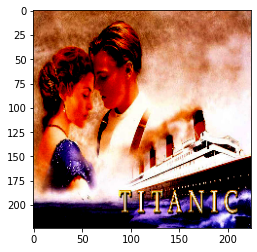

In [ ]:
from matplotlib import pyplot
sample_num = 10
print(X_train[sample_num])
pyplot.imshow(X_train[sample_num])

Print the mask

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


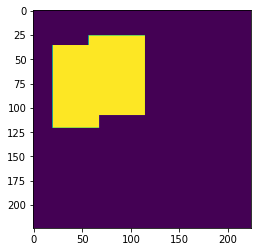

In [ ]:
print(y_train[sample_num])
pyplot.imshow(y_train[sample_num])

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    #### Add your code here ####

    def conv_block_simple(prev, num_filters, name):
        return Conv2D(num_filters, activation='relu', kernel_size=(3, 3), padding='same', name=name + '_3x3')(prev)

    conv0 = model.get_layer("conv_pw_1_relu").output # 112 x 112
    conv1 = model.get_layer("conv_pw_3_relu").output # 56 x 56
    conv2 = model.get_layer("conv_pw_5_relu").output # 28 x 28
    conv3 = model.get_layer("conv_pw_11_relu").output # 14 x 14
   
    up6 = model.output 
    conv7 = up6

    up8 = Concatenate()([UpSampling2D()(conv7), conv3])
    conv8 = conv_block_simple(up8, 512, "conv8_1")

    up9 = Concatenate()([UpSampling2D()(conv8), conv2])
    conv9 = conv_block_simple(up9, 256, "conv9_1")

    up10 = Concatenate()([UpSampling2D()(conv9), conv1])
    conv10 = conv_block_simple(up10, 128, "conv10_1")

    up11 = Concatenate()([UpSampling2D()(conv10), conv0])
    conv11 = conv_block_simple(up11, 64, "conv11_1")

    up12 = UpSampling2D()(conv11)
    conv12 = conv_block_simple(up12, 32, "conv12_1")

    x = Conv2D(1, (1, 1), activation="sigmoid", name="prediction")(conv12)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
# model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")
unet_model = create_model(False)

### Print model summary (1 mark)

In [ ]:
unet_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
____________________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [ ]:
import tensorflow as tf

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (2 marks)

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.keras.backend.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer = Adam()
unet_model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
EPOCHS = 50 # Number of epochs
BATCH_SIZE = 1 # Depends on your GPU or CPU RAM.
PATIENCE = 5 # Patience for early stopping
VERBOSE = 1

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("unet_model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=PATIENCE, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
unet_model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = VERBOSE)

Epoch 1/50
400/400 [==============================] - 10s 19ms/step - loss: 1.4008 - dice_coefficient: 0.4367
Epoch 2/50
400/400 [==============================] - 8s 19ms/step - loss: 0.7552 - dice_coefficient: 0.6180
Epoch 3/50
400/400 [==============================] - 8s 19ms/step - loss: 0.7187 - dice_coefficient: 0.6550
Epoch 4/50
400/400 [==============================] - 8s 19ms/step - loss: 0.6261 - dice_coefficient: 0.6740
Epoch 5/50
400/400 [==============================] - 8s 19ms/step - loss: 0.5897 - dice_coefficient: 0.6862
Epoch 6/50
400/400 [==============================] - 8s 19ms/step - loss: 0.5278 - dice_coefficient: 0.7243
Epoch 7/50
400/400 [==============================] - 8s 19ms/step - loss: 0.4586 - dice_coefficient: 0.7424
Epoch 8/50
400/400 [==============================] - 8s 19ms/step - loss: 0.4609 - dice_coefficient: 0.7808
Epoch 9/50
400/400 [==============================] - 8s 19ms/step - loss: 0.4320 - dice_coefficient: 0.8058
Epoch 10/50
400/40

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


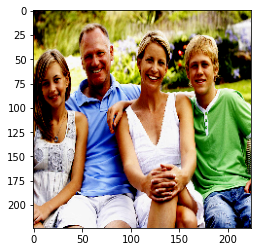

In [ ]:
sample_num = 1

test_image = X_test[sample_num]

pyplot.imshow(X_test[sample_num])

Show original mask for test image

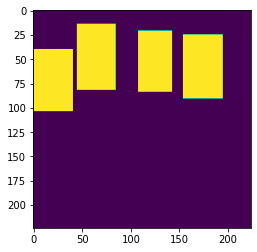

In [ ]:
test_mask_original = y_test[sample_num]
pyplot.imshow(test_mask_original)

Predict the mask on the test image

In [ ]:
pred_mask_proba = unet_model.predict(x=np.array([test_image]))[0]
pred_mask = cv2.resize(1.0*(pred_mask_proba>0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


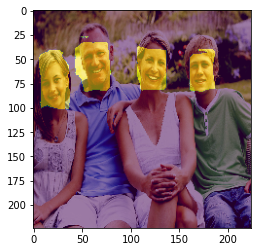

In [ ]:
pyplot.imshow(test_image)
pyplot.imshow(pred_mask, alpha=0.51)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

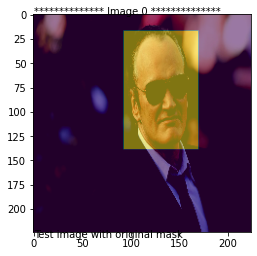

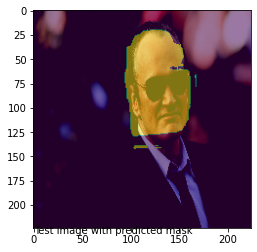

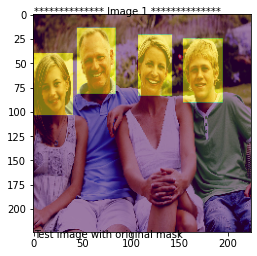

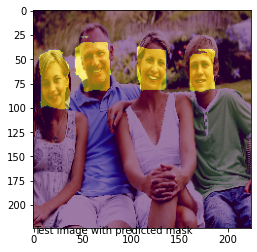

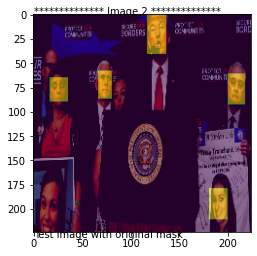

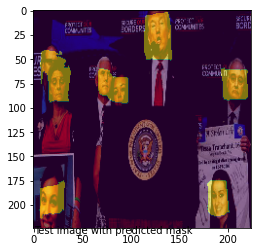

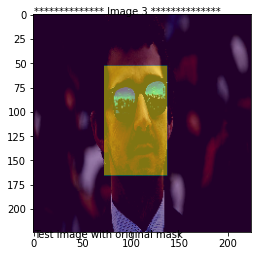

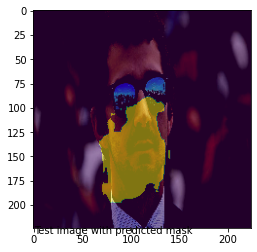

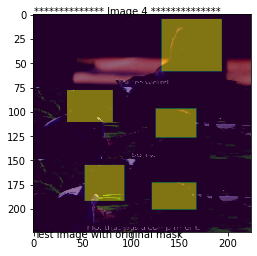

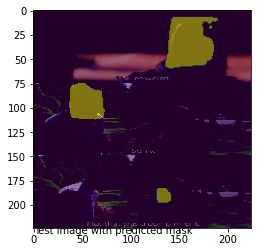

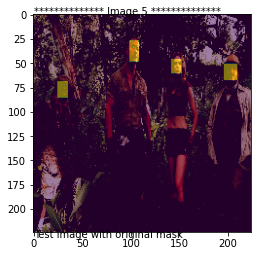

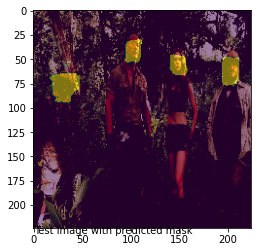

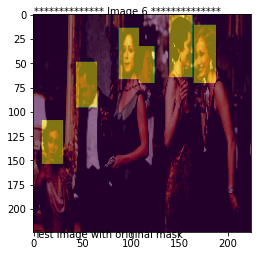

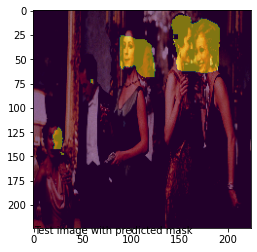

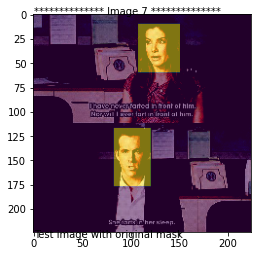

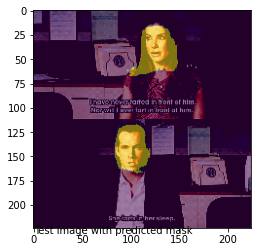

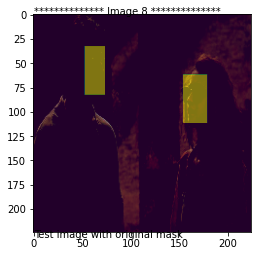

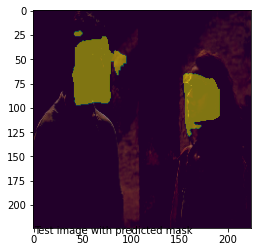

In [ ]:
for index in range(9):
  pyplot.figure()
  pyplot.text(0,0,"************** Image {} **************".format(index))
  test_image = X_test[index]
  pyplot.imshow(test_image)
  pyplot.text(0,230,"Test image with original mask")
  test_mask_original = y_test[index]
  pyplot.imshow(test_mask_original, alpha=0.51)
  pred_mask_proba = unet_model.predict(x=np.array([test_image]))[0]
  pred_mask = cv2.resize(1.0*(pred_mask_proba>0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))
  pyplot.figure()
  pyplot.imshow(test_image)
  pyplot.imshow(pred_mask, alpha=0.51)
  pyplot.text(0,230,"Test image with predicted mask")

### Observations
- With trainable of MobileNet layers set to False, we managed to achieve a dice coefficient of 0.97
- The predicted masks of test images showed fairly good accuracy for well defined images and average accuracy for obscured images
- With trainable set to True, a higher accuracy of mask prediction should be achieved